In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/MATIC-USD.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,0.016474,0.017329,0.016474,0.016910,0.016910,19771871
1,2020-01-28,0.016913,0.017292,0.016605,0.017256,0.017256,21017696
2,2020-01-29,0.017233,0.017234,0.016807,0.017110,0.017110,16464099
3,2020-01-30,0.017106,0.018700,0.016902,0.018645,0.018645,34829353
4,2020-01-31,0.018634,0.018838,0.017762,0.017928,0.017928,24882814


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1050,2022-12-12,0.893295,0.911576,0.875428,0.910573,0.910573,236843698
1051,2022-12-13,0.910558,0.938251,0.882370,0.923434,0.923434,422558230
1052,2022-12-14,0.923530,0.936157,0.900713,0.903347,0.903347,328675064
1053,2022-12-15,0.903340,0.905715,0.873785,0.877981,0.877981,243269084
1054,2022-12-16,0.877970,0.889978,0.789783,0.795795,0.795795,423423337


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03
mean,0.738128,0.776474,0.700186,0.738558,0.738558,6.779306e+08
std,0.701405,0.737872,0.663660,0.700529,0.700529,9.893783e+08
min,0.008109,0.009060,0.007011,0.008096,0.008096,4.780011e+06
25%,0.021161,0.021983,0.020443,0.021185,0.021185,3.108116e+07
50%,0.733322,0.765729,0.690819,0.737566,0.737566,4.070568e+08
75%,1.320648,1.383421,1.237853,1.323199,1.323199,8.819761e+08
max,2.876459,2.923235,2.712710,2.876757,2.876757,9.181248e+09


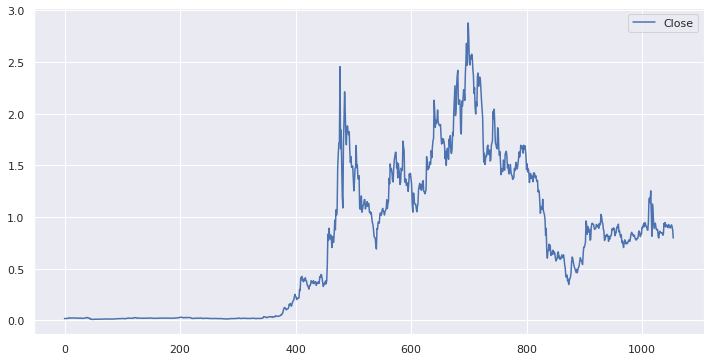

In [6]:
df[['Close']].plot(figsize=(12,6));


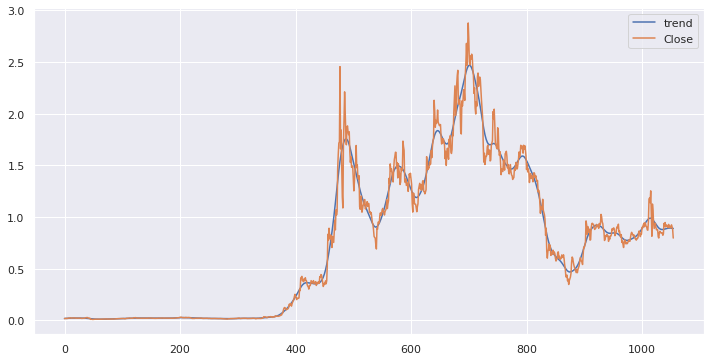

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.5775546284156834,
 0.49485797155092315,
 6,
 1048,
 {'1%': -3.436605142651622,
  '5%': -2.8643018096684587,
  '10%': -2.568240496510984},
 -2311.663550531016)

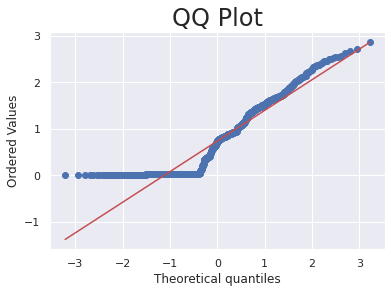

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


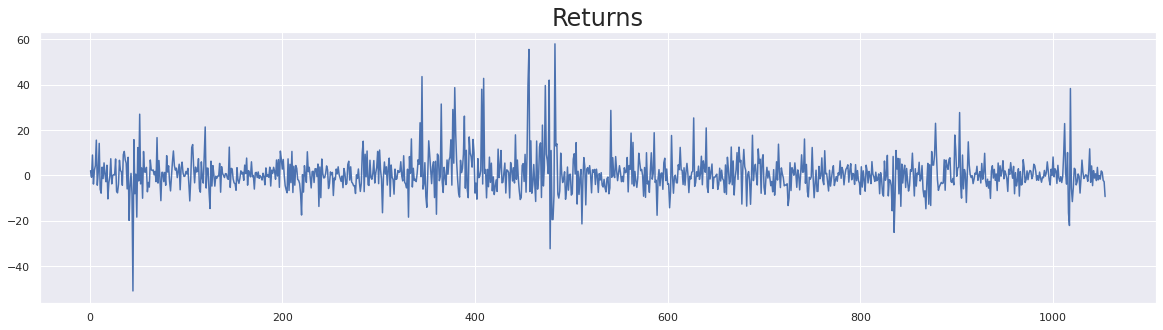

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


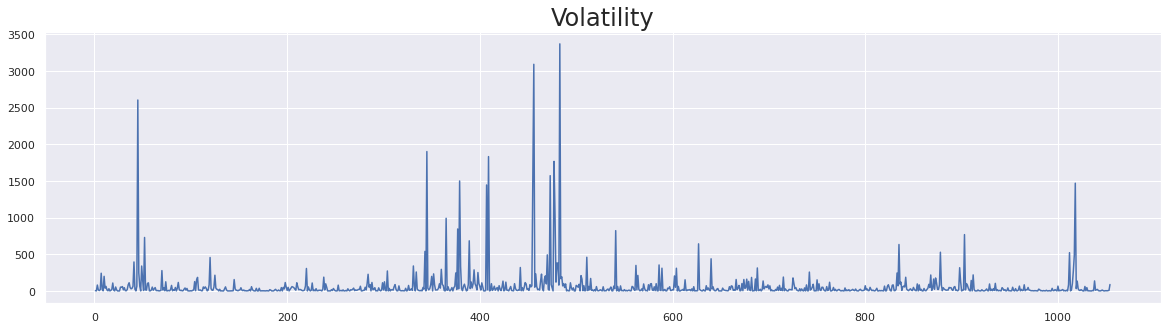

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

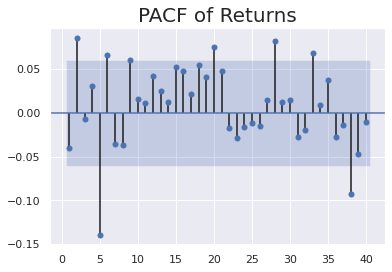

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

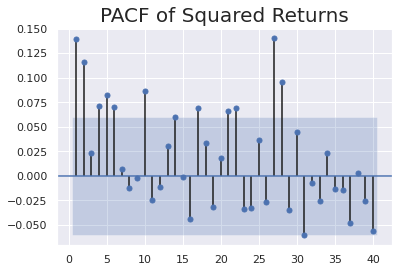

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 14.9 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3718.27900499129
Iteration:      2,   Func. Count:     11,   Neg. LLF: 3680.664369397434
Iteration:      3,   Func. Count:     17,   Neg. LLF: 3680.045625264165
Iteration:      4,   Func. Count:     21,   Neg. LLF: 3680.0415974299954
Iteration:      5,   Func. Count:     25,   Neg. LLF: 3680.037792872661
Iteration:      6,   Func. Count:     29,   Neg. LLF: 3680.0364277728727
Iteration:      7,   Func. Count:     33,   Neg. LLF: 3680.0362856841657
Iteration:      8,   Func. Count:     37,   Neg. LLF: 3680.0362817556424
Iteration:      9,   Func. Count:     40,   Neg. LLF: 3680.0362817556183
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3680.0362817556424
            Iterations: 9
            Function evaluations: 40
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3680.04
Distribution:                  Normal   AIC:                           7366.07
Method:            Maximum Likelihood   BIC:                           7380.95
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:31   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.7042      0.247      2.849  4.381e-03 [  0.220,  1.189]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         53.8807      6.765      7.965  1.650e-15    [ 40.622, 67.139]
alpha[1]       0.2118      0.125      1.690  9.100e-02 [-3.382e-02,  0.458]
===========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 3633.02912599331
Iteration:     10,   Func. Count:     55,   Neg. LLF: 3633.018602691363
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3633.018602691466
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3633.02
Distribution:                  Normal   AIC:                           7274.04
Method:            Maximum Likelihood   BIC:                           7293.88
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:31   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.4503      0.223      2.023  4.305e-02 [1.408e-02,  0.886]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         40.2940      5.655      7.125  1.039e-12    [ 29.210, 51.378]
alpha[1]       0.1477  8.503e-02      1.738  8.228e-02 [-1.891e-02,  0.314]
alpha[2]       0.2779      0.103      2.701  6.923e-03  [7.621e-02,  0.480]
===========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 3621.3808660860077
Iteration:     10,   Func. Count:     68,   Neg. LLF: 3621.3712425733174
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3621.3712425732997
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3621.37
Distribution:                  Normal   AIC:                           7252.74
Method:            Maximum Likelihood   BIC:                           7277.54
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:31   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.3521      0.218      1.617      0.106 [-7.474e-02,  0.779]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         32.9807      6.236      5.289  1.230e-07    [ 20.759, 45.203]
alpha[1]       0.1732      0.108      1.609      0.108 [-3.783e-02,  0.384]
alpha[2]       0.2041  7.823e-02      2.609  9.077e-03  [5.079e-02,  0.357]
alpha[3]       0.1997      0.125      1.598      0.110 [-4.528e-02,  0.445]
===========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     86,   Neg. LLF: 3861.0889858685505
Iteration:     10,   Func. Count:    172,   Neg. LLF: 3702.542635331077
Iteration:     15,   Func. Count:    259,   Neg. LLF: 3564.0348965927838
Iteration:     20,   Func. Count:    345,   Neg. LLF: 3560.9412645429306
Iteration:     25,   Func. Count:    429,   Neg. LLF: 3558.9268518481517
Iteration:     30,   Func. Count:    510,   Neg. LLF: 3558.9214423290778
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3558.9214405846387
            Iterations: 32
            Function evaluations: 541
            Gradient evaluations: 32


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3558.92
Distribution:                  Normal   AIC:                           7147.84
Method:            Maximum Likelihood   BIC:                           7222.25
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:32   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4831      0.194      2.486  1.292e-02 [  0.102,  0.864]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         14.8846      3.730      3.990  6.595e-05      [  7.574, 22.195]
alpha[1]       0.1127  6.893e-02      1.635      0.102   [-2.239e-02,  0.248]
alpha[2]       0.2363  7.337e-02      3.220  1.280e-03    [9.247e-02,  0.380]
alpha[3]       0.0509  5.647e-02      0.901      0.367   [-5.979e-02,  0.162]
alpha[4]       0.1095  6.653e-02      1.646  9.980e-02   [-2.090e-02,  0.240]
alpha[5]       0.3398      0.176      1.934  5.306e-02   [-4.482e-03,  0.684]
alpha[6]   1.8851e-11  2.586e-02  7.291e-10      1.000 [-5.068e-02,5.068e-02]
alpha[7]   4.4471e-03  2.138e-02      0.208      0.835 [-3.745e-02,4.634e-02]
alpha[8]   6.2242e-03  2.473e-02      0.252      0.801 [-4.225e-02,5.470e-02]
alpha[9]       0.0184  3.910e-02      0.470      0.638 [-5.825e-02,9.502e-02]
alpha[10]      0.0188  2.728e-02      0.688      0.492 [-3.471e-02,7.224e-02]
alpha[11]  6.8086e-12  1.450e-02  4.694e-10      1.000 [-2.843e-02,2.843e-02]
alpha[12]      0.0153  3.706e-02      0.412      0.681 [-5.737e-02,8.789e-02]
alpha[13]      0.0110  9.844e-02      0.112      0.911      [ -0.182,  0.204]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 5118.887776640719
Iteration:     10,   Func. Count:     60,   Neg. LLF: 3580.720396996965
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3580.7203969969933
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3580.72
Distribution:                  Normal   AIC:                           7169.44
Method:            Maximum Likelihood   BIC:                           7189.28
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:32   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.3733      0.196      1.904  5.687e-02 [-1.091e-02,  0.758]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.3527      1.838      1.280      0.201   [ -1.250,  5.956]
alpha[1]       0.1669  6.685e-02      2.497  1.254e-02 [3.587e-02,  0.298]
beta[1]        0.8168  7.467e-02     10.939  7.478e-28   [  0.670,  0.963]
==========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 3583.2260778509176
Iteration:     10,   Func. Count:     69,   Neg. LLF: 3580.7210633358236
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3580.720397122906
            Iterations: 14
            Function evaluations: 92
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3580.72
Distribution:                  Normal   AIC:                           7171.44
Method:            Maximum Likelihood   BIC:                           7196.24
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:32   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.3734      0.198      1.890  5.882e-02 [-1.392e-02,  0.761]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.3529      1.794      1.311      0.190   [ -1.164,  5.870]
alpha[1]       0.1669  5.408e-02      3.086  2.029e-03 [6.089e-02,  0.273]
beta[1]        0.8168      0.323      2.529  1.144e-02   [  0.184,  1.450]
beta[2]    2.2223e-15      0.332  6.684e-15      1.000   [ -0.652,  0.652]
==========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 3592.879686399156
Iteration:     10,   Func. Count:     79,   Neg. LLF: 3580.8944269604954
Iteration:     15,   Func. Count:    114,   Neg. LLF: 3580.85836443226
Iteration:     20,   Func. Count:    149,   Neg. LLF: 3583.798187145505
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3580.7203971487424
            Iterations: 25
            Function evaluations: 184
            Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3580.72
Distribution:                  Normal   AIC:                           7173.44
Method:            Maximum Likelihood   BIC:                           7203.20
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:32   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3733      0.288      1.296      0.195 [ -0.191,  0.938]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.3522      2.459      0.957      0.339 [ -2.467,  7.171]
alpha[1]       0.1669      0.143      1.165      0.244 [ -0.114,  0.448]
beta[1]        0.8169      1.007      0.811      0.417 [ -1.156,  2.790]
beta[2]    1.7044e-14      0.669  2.546e-14      1.000 [ -1.312,  1.312]
beta[3]    5.3090e-15      1.502  3.534e-15      1.000 [ -2.944,  2.944]
========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 3586.7232694552567
Iteration:     10,   Func. Count:     71,   Neg. LLF: 3579.4372665329693
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3579.4369188470673
            Iterations: 13
            Function evaluations: 89
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3579.44
Distribution:                  Normal   AIC:                           7168.87
Method:            Maximum Likelihood   BIC:                           7193.68
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:32   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3971      0.199      1.992  4.636e-02 [6.415e-03,  0.788]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          3.6512      3.446      1.059      0.289    [ -3.103, 10.406]
alpha[1]       0.1129  7.163e-02      1.576      0.115 [-2.751e-02,  0.253]
alpha[2]       0.0986      0.129      0.765      0.444    [ -0.154,  0.351]
beta[1]        0.7578      0.136      5.566  2.601e-08    [  0.491,  1.025]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 3647.4459002559124
Iteration:     10,   Func. Count:     79,   Neg. LLF: 3579.4373424763644
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3579.4369188849914
            Iterations: 14
            Function evaluations: 106
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3579.44
Distribution:                  Normal   AIC:                           7170.87
Method:            Maximum Likelihood   BIC:                           7200.64
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:32   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.3971      0.234      1.699  8.936e-02 [-6.106e-02,  0.855]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          3.6511      9.881      0.370      0.712    [-15.715, 23.017]
alpha[1]       0.1129  7.857e-02      1.437      0.151 [-4.109e-02,  0.267]
alpha[2]       0.0986      0.154      0.640      0.522    [ -0.204,  0.401]
alpha[3]       0.0000      0.293      0.000      1.000    [ -0.573,  0.573]
beta[1]        0.7578      0.465      1.630      0.103    [ -0.153,  1.669]
===========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 3605.01986808923
Iteration:     10,   Func. Count:     78,   Neg. LLF: 3571.8644152243205
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3571.8643855173095
            Iterations: 12
            Function evaluations: 89
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3571.86
Distribution:                  Normal   AIC:                           7153.73
Method:            Maximum Likelihood   BIC:                           7178.53
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:33   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.3763      0.205      1.834  6.659e-02 [-2.575e-02,  0.778]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1768  9.590e-02      1.844  6.521e-02   [-1.114e-02,  0.365]
alpha[1]       0.2979  7.693e-02      3.873  1.076e-04      [  0.147,  0.449]
gamma[1]       0.0141  3.916e-02      0.361      0.718 [-6.261e-02,9.089e-02]
beta[1]        0.9616  2.338e-02     41.126      0.000      [  0.916,  1.007]
=============================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3580.46
Distribution:                  Normal   AIC:                           7170.93
Method:            Maximum Likelihood   BIC:                           7195.73
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:33   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.3414      0.197      1.730  8.359e-02 [-4.533e-02,  0.728]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.2406      1.790      1.252      0.211   [ -1.268,  5.749]
alpha[1]       0.1565  6.373e-02      2.456  1.404e-02 [3.163e-02,  0.281]
gamma[1]       0.0277  7.410e-02      0.374      0.708   [ -0.117,  0.173]
beta[1]        0.8179  7.261e-02     11.264  1.968e-29   [  0.676,  0.960]
==========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 3821.8167338034264
Iteration:     10,   Func. Count:     73,   Neg. LLF: 3572.6163768993492
Iteration:     15,   Func. Count:    104,   Neg. LLF: 3572.614387865712
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3572.6143635705735
            Iterations: 17
            Function evaluations: 120
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -3572.61
Distribution:                  Normal   AIC:                           7155.23
Method:            Maximum Likelihood   BIC:                           7180.03
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:33   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4004  6.421e-03     62.366      0.000 [  0.388,  0.413]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3397      0.234      1.450      0.147   [ -0.119,  0.799]
alpha[1]       0.1742  4.745e-02      3.670  2.427e-04 [8.114e-02,  0.267]
gamma[1]      -0.0368  4.610e-02     -0.799      0.424 [ -0.127,5.351e-02]
beta[1]        0.8443  5.436e-02     15.531  2.148e-54   [  0.738,  0.951]
==========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 3575.2951785315317
Iteration:     10,   Func. Count:     67,   Neg. LLF: 3573.920292099556
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3573.920292099556
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -3573.92
Distribution:                  Normal   AIC:                           7157.84
Method:            Maximum Likelihood   BIC:                           7182.64
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:33   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.3508      0.184      1.905  5.678e-02 [-1.011e-02,  0.712]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.9267      1.968      1.995  4.599e-02 [6.986e-02,  7.783]
phi        4.8910e-17      0.142  3.434e-16      1.000   [ -0.279,  0.279]
d              0.5586      0.179      3.124  1.784e-03   [  0.208,  0.909]
beta           0.4231      0.193      2.189  2.863e-02 [4.419e-02,  0.802]
==========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     26,   Neg. LLF: 3734.907173054177
Iteration:     10,   Func. Count:     49,   Neg. LLF: 3680.45891551441
Iteration:     15,   Func. Count:     68,   Neg. LLF: 3680.036281701194
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3680.036281701151
            Iterations: 15
            Function evaluations: 68
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -3680.04
Distribution:                  Normal   AIC:                           7366.07
Method:            Maximum Likelihood   BIC:                           7380.95
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:33   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.7042      0.247      2.849  4.381e-03 [  0.220,  1.189]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         53.8796      6.765      7.965  1.652e-15    [ 40.621, 67.138]
alpha[1]       0.2119      0.125      1.690  9.101e-02 [-3.383e-02,  0.458]
===========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 3737.6229419120536
Iteration:     10,   Func. Count:     83,   Neg. LLF: 3579.2169188190664
Iteration:     15,   Func. Count:    119,   Neg. LLF: 3574.0066166641554
Iteration:     20,   Func. Count:    158,   Neg. LLF: 3574.5913493117496
Iteration:     25,   Func. Count:    197,   Neg. LLF: 3572.1204880084697
Iteration:     30,   Func. Count:    232,   Neg. LLF: 3571.982473871091
Iteration:     35,   Func. Count:    267,   Neg. LLF: 3571.967488957639
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3571.967469988435
            Iterations: 37
            Function evaluations: 280
            Gradient evaluations: 37


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -3571.97
Distribution:                  Normal   AIC:                           7155.93
Method:            Maximum Likelihood   BIC:                           7185.70
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:41:34   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3863      0.153      2.522  1.167e-02 [8.609e-02,  0.687]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1414      0.267      0.530      0.596   [ -0.381,  0.664]
alpha[1]       0.1385  5.801e-02      2.387  1.699e-02 [2.476e-02,  0.252]
gamma[1]      -0.1604      0.180     -0.893      0.372   [ -0.512,  0.192]
beta[1]        0.8615  6.041e-02     14.262  3.802e-46   [  0.743,  0.980]
delta          0.6555      0.585      1.120      0.263   [ -0.492,  1.803]
==========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=79.82882737597123, pvalue=0.0)

In [46]:
jarque_bera_test.statistic

79.82882737597123

In [47]:
jarque_bera_test.pvalue

0.0

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1       2.046127
2      -0.846083
3       8.971362
4      -3.845535
5       2.247880
          ...   
1050    1.941263
1051    1.412407
1052   -2.175250
1053   -2.808002
1054   -9.360795
Name: returns, Length: 1054, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=4511.7397712411985, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

4511.7397712411985

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

9.793300442705561

coef. asimetria

In [53]:
returns.skew()

1.4022464977407356

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -33.860
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -9.696
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -10.792
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.394
P-value                         0.075
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1055 non-null   object 
 1   Open        1055 non-null   float64
 2   High        1055 non-null   float64
 3   Low         1055 non-null   float64
 4   Close       1055 non-null   float64
 5   Adj Close   1055 non-null   float64
 6   Volume      1055 non-null   int64  
 7   trend       1055 non-null   float64
 8   returns     1054 non-null   float64
 9   sq_returns  1054 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 82.5+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/MATIC-USD.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,0.016474,0.017329,0.016474,0.016910,0.016910,19771871
1,2020-01-28,0.016913,0.017292,0.016605,0.017256,0.017256,21017696
2,2020-01-29,0.017233,0.017234,0.016807,0.017110,0.017110,16464099
3,2020-01-30,0.017106,0.018700,0.016902,0.018645,0.018645,34829353
4,2020-01-31,0.018634,0.018838,0.017762,0.017928,0.017928,24882814
...,...,...,...,...,...,...,...
1050,2022-12-12,0.893295,0.911576,0.875428,0.910573,0.910573,236843698
1051,2022-12-13,0.910558,0.938251,0.882370,0.923434,0.923434,422558230
1052,2022-12-14,0.923530,0.936157,0.900713,0.903347,0.903347,328675064
1053,2022-12-15,0.903340,0.905715,0.873785,0.877981,0.877981,243269084


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27,0.016910,19771871
1,2020-01-28,0.017256,21017696
2,2020-01-29,0.017110,16464099
3,2020-01-30,0.018645,34829353
4,2020-01-31,0.017928,24882814
...,...,...,...
1050,2022-12-12,0.910573,236843698
1051,2022-12-13,0.923434,422558230
1052,2022-12-14,0.903347,328675064
1053,2022-12-15,0.877981,243269084


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,0.016910,19771871,0.017256
1,2020-01-28,0.017256,21017696,0.017110
2,2020-01-29,0.017110,16464099,0.018645
3,2020-01-30,0.018645,34829353,0.017928
4,2020-01-31,0.017928,24882814,0.018331
...,...,...,...,...
1050,2022-12-12,0.910573,236843698,0.923434
1051,2022-12-13,0.923434,422558230,0.903347
1052,2022-12-14,0.903347,328675064,0.877981
1053,2022-12-15,0.877981,243269084,0.795795


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,0.016910,19771871,0.017256
1,2020-01-28,0.017256,21017696,0.017110
2,2020-01-29,0.017110,16464099,0.018645
3,2020-01-30,0.018645,34829353,0.017928
4,2020-01-31,0.017928,24882814,0.018331
...,...,...,...,...
1049,2022-12-11,0.893233,141914043,0.910573
1050,2022-12-12,0.910573,236843698,0.923434
1051,2022-12-13,0.923434,422558230,0.903347
1052,2022-12-14,0.903347,328675064,0.877981


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.00307251, 0.00163373, 0.00319313],
       [0.00319313, 0.00176949, 0.00314223],
       [0.00314223, 0.00127327, 0.00367733],
       ...,
       [0.31908197, 0.04552713, 0.31207975],
       [0.31207975, 0.03529626, 0.30323729],
       [0.30323729, 0.0259892 , 0.27458769]])

In [73]:
price_volume_target_scaled_df.shape

(1054, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((1054, 2), (1054, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((685, 2), (685, 1))

In [78]:
X_test.shape, y_test.shape

((369, 2), (369, 1))

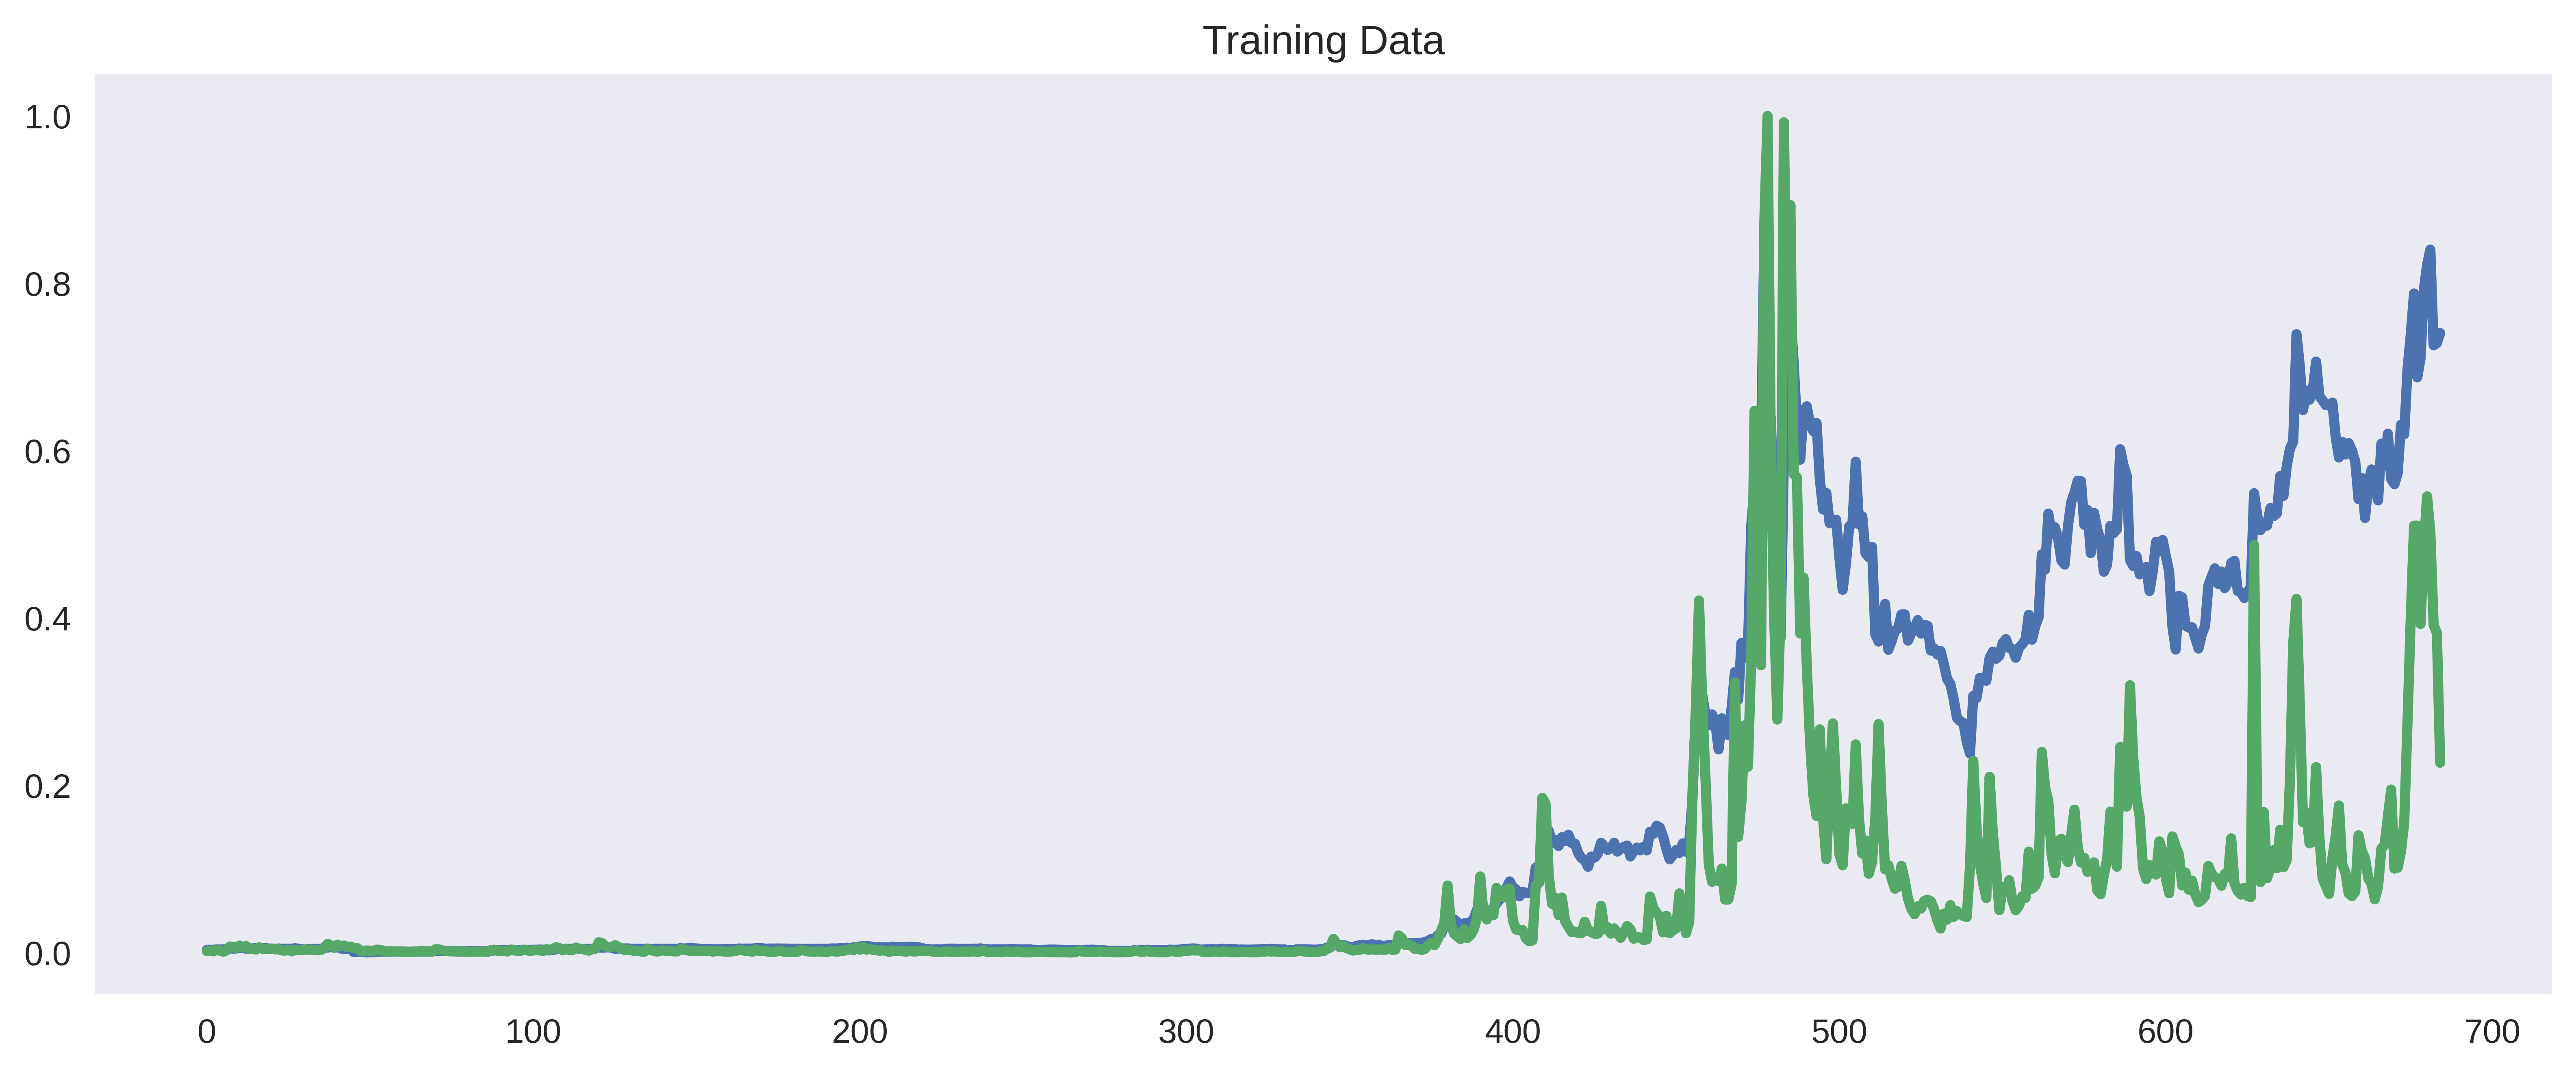

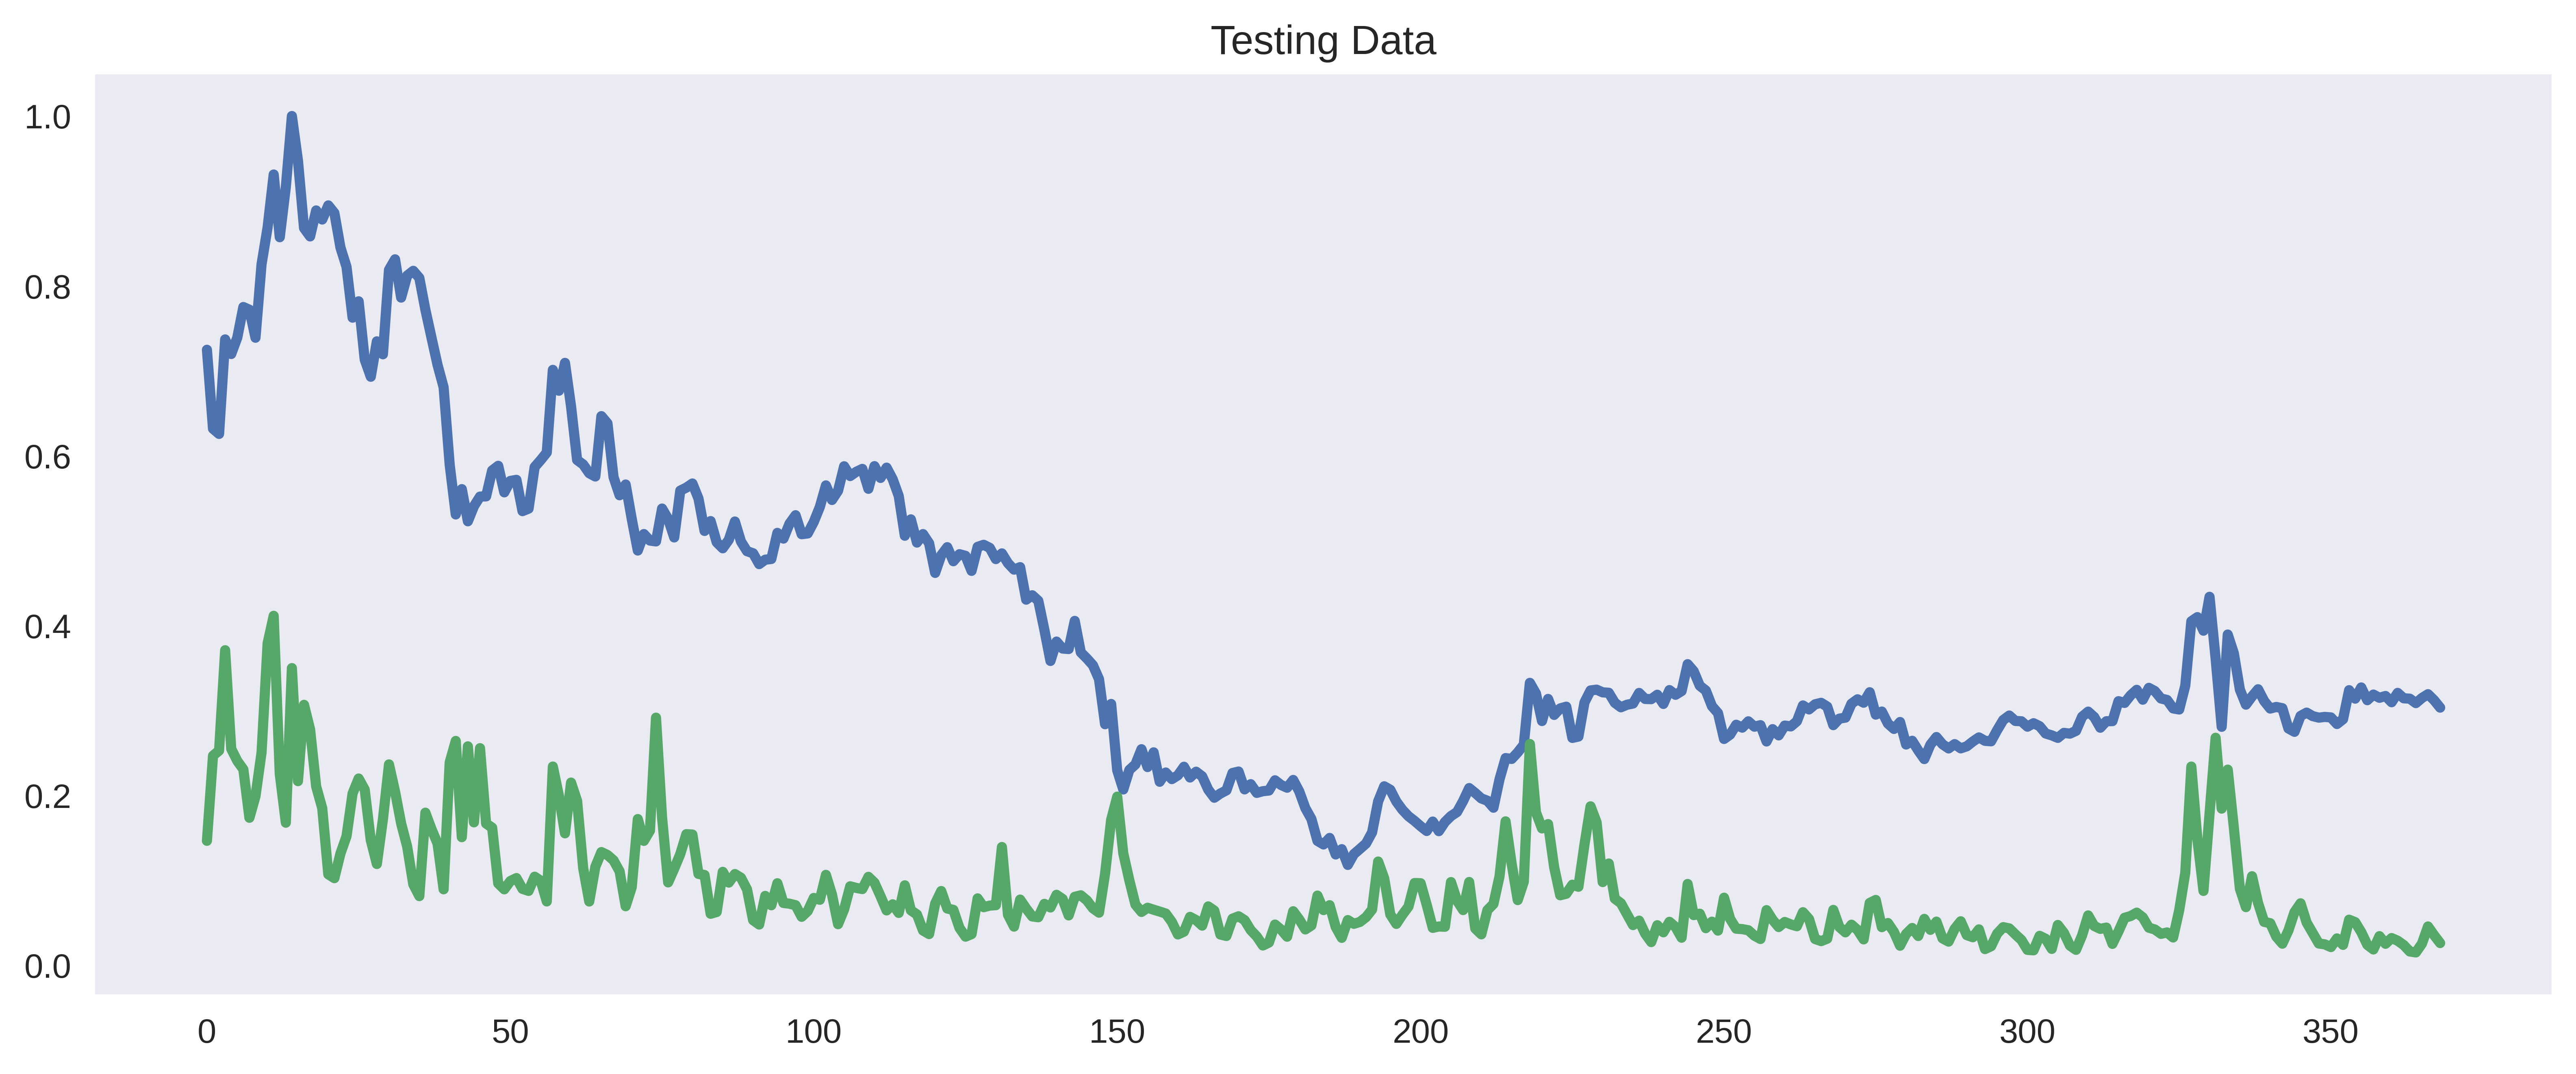

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9778786341701308


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.00935591],
       [0.00947871],
       [0.00939902],
       ...,
       [0.31129048],
       [0.30401231],
       [0.29505075]])

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

1054

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
1049,2022-12-11
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.003073
1,2020-01-28,0.003193
2,2020-01-29,0.003142
3,2020-01-30,0.003677
4,2020-01-31,0.003427
...,...,...
1049,2022-12-11,0.308554
1050,2022-12-12,0.314599
1051,2022-12-13,0.319082
1052,2022-12-14,0.312080


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.003073,0.009356
1,2020-01-28,0.003193,0.009479
2,2020-01-29,0.003142,0.009399
3,2020-01-30,0.003677,0.010033
4,2020-01-31,0.003427,0.009727
...,...,...,...
1049,2022-12-11,0.308554,0.299383
1050,2022-12-12,0.314599,0.305761
1051,2022-12-13,0.319082,0.311290
1052,2022-12-14,0.312080,0.304012


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27,0.016910,19771871,0.017256
1,2020-01-28,0.017256,21017696,0.017110
2,2020-01-29,0.017110,16464099,0.018645
3,2020-01-30,0.018645,34829353,0.017928
4,2020-01-31,0.017928,24882814,0.018331
...,...,...,...,...
1050,2022-12-12,0.910573,236843698,0.923434
1051,2022-12-13,0.923434,422558230,0.903347
1052,2022-12-14,0.903347,328675064,0.877981
1053,2022-12-15,0.877981,243269084,0.795795


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,0.016910,19771871,0.017256
1,2020-01-28,0.017256,21017696,0.017110
2,2020-01-29,0.017110,16464099,0.018645
3,2020-01-30,0.018645,34829353,0.017928
4,2020-01-31,0.017928,24882814,0.018331
...,...,...,...,...
1050,2022-12-12,0.910573,236843698,0.923434
1051,2022-12-13,0.923434,422558230,0.903347
1052,2022-12-14,0.903347,328675064,0.877981
1053,2022-12-15,0.877981,243269084,0.795795


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.69100000e-02, 1.97718710e+07],
       [1.72560000e-02, 2.10176960e+07],
       [1.71100000e-02, 1.64640990e+07],
       ...,
       [9.03347000e-01, 3.28675064e+08],
       [8.77981000e-01, 2.43269084e+08],
       [7.95795000e-01, 4.23423337e+08]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.00307251]),
 array([0.00319313]),
 array([0.00314223]),
 array([0.00367733]),
 array([0.00342738]),
 array([0.00356787]),
 array([0.00384116]),
 array([0.00487684]),
 array([0.00454323]),
 array([0.00464921]),
 array([0.00570405]),
 array([0.00518221]),
 array([0.0045523]),
 array([0.00481897]),
 array([0.00471021]),
 array([0.00512504]),
 array([0.0051599]),
 array([0.00493471]),
 array([0.00528226]),
 array([0.0044397]),
 array([0.00420545]),
 array([0.00416919]),
 array([0.00468163]),
 array([0.00439822]),
 array([0.00439229]),
 array([0.00441565]),
 array([0.00442715]),
 array([0.00495109]),
 array([0.00440415]),
 array([0.0038457]),
 array([0.00358565]),
 array([0.00401198]),
 array([0.00415908]),
 array([0.00426854]),
 array([0.00395829]),
 array([0.00457914]),
 array([0.00536139]),
 array([0.00592053]),
 array([0.00639079]),
 array([0.00583826]),
 array([0.00652953]),
 array([0.00467012]),
 array([0.0043041]),
 array([0.0043651]),
 array([0.00378609]),
 array([0.000413

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((737, 1, 1), (317, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
19/19 [==============================] - 12s 104ms/step - loss: 0.0387 - val_loss: 0.2017
Epoch 2/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0246 - val_loss: 0.0917
Epoch 3/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0049 - val_loss: 0.0085
Epoch 4/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 5/20
19/19 [==============================] - 0s 14ms/step - loss: 9.8845e-04 - val_loss: 0.0018
Epoch 6/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 7/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 8/20
19/19 [==============================] - 0s 14ms/step - loss: 9.2897e-04 - val_loss: 0.0017
Epoch 9/20
19/19 [==============================] - 0s 14ms/step - loss: 9.5424e-04 - val_loss: 0.0017
Epoch 10/20
19/19 [==============================] - 0s 15ms/step - loss: 8.5825e-04 - val_loss

In [102]:
# Make prediction
predicted = model.predict(X)

33/33 [==============================] - 2s 6ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.010859276,
 0.0109845335,
 0.010931682,
 0.011487334,
 0.011227798,
 0.011373671,
 0.011657454,
 0.012732703,
 0.012386378,
 0.012496391,
 0.013591346,
 0.013049692,
 0.01239579,
 0.012672636,
 0.012559727,
 0.01299035,
 0.013026537,
 0.012792774,
 0.013153542,
 0.012278894,
 0.0120356865,
 0.011998048,
 0.01253005,
 0.012235829,
 0.012229679,
 0.0122539215,
 0.012265866,
 0.012809779,
 0.012241979,
 0.011662167,
 0.011392138,
 0.011834811,
 0.01198755,
 0.012101193,
 0.011779071,
 0.012423655,
 0.013235679,
 0.013816022,
 0.014304049,
 0.013730636,
 0.014448026,
 0.012518108,
 0.012138109,
 0.012201447,
 0.011600269,
 0.008097365,
 0.008626914,
 0.008310709,
 0.008330267,
 0.00766737,
 0.00802709,
 0.007945581,
 0.008812711,
 0.008658424,
 0.008786997,
 0.008377721,
 0.008761277,
 0.008821766,
 0.008880436,
 0.009026755,
 0.008715288,
 0.008591054,
 0.008391122,
 0.008638861,
 0.008734843,
 0.0088214,
 0.008919188,
 0.008928608,
 0.009002486,
 0.008883694,
 0.009574666,
 0.00940953

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-01
...,...
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14
1053,2022-12-15


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28,0.010859
2,2020-01-29,0.010985
3,2020-01-30,0.010932
4,2020-01-31,0.011487
5,2020-02-01,0.011228
...,...,...
1050,2022-12-12,0.316336
1051,2022-12-13,0.322124
1052,2022-12-14,0.326410
1053,2022-12-15,0.319713


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.010859,0.003193
2,2020-01-29,0.010985,0.003142
3,2020-01-30,0.010932,0.003677
4,2020-01-31,0.011487,0.003427
5,2020-02-01,0.011228,0.003568
...,...,...,...
1050,2022-12-12,0.316336,0.314599
1051,2022-12-13,0.322124,0.319082
1052,2022-12-14,0.326410,0.312080
1053,2022-12-15,0.319713,0.303237


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")